In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
embeddings_dict = {}
with open("data/glove.6B.50d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

In [3]:
embeddings_dict['code']

array([-0.44412  , -0.67868  , -0.094546 ,  0.34215  ,  0.013901 ,
        0.16031  ,  0.47052  , -1.7445   ,  0.38626  , -0.55589  ,
        0.18766  ,  0.97665  ,  0.045589 ,  0.026169 ,  0.17745  ,
       -0.53058  , -1.0001   ,  0.034003 ,  0.37809  , -0.21039  ,
       -0.18568  , -0.9391   , -0.105    ,  0.69634  , -0.075046 ,
       -1.4277   , -0.47106  , -0.28648  ,  0.24325  , -0.86597  ,
        2.7155   , -0.84736  , -0.89026  , -0.42889  ,  0.0073904,
        0.20806  ,  0.94242  , -0.8303   , -0.6176   ,  0.53572  ,
        0.50985  , -0.27999  ,  0.5226   ,  1.0908   , -1.3746   ,
        0.55885  ,  0.66053  ,  0.50033  ,  0.47428  ,  0.040882 ],
      dtype=float32)

In [25]:
def find_closest_embeddings(embedding, cutoff=25):
    return sorted(embeddings_dict.keys(), key=lambda token: spatial.distance.euclidean(embeddings_dict[token], embedding))


In [29]:
print(find_closest_embeddings(
    embeddings_dict["king"] - embeddings_dict["man"] + embeddings_dict["woman"]
)[:5])

['king', 'queen', 'prince', 'elizabeth', 'daughter']


In [34]:
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


In [35]:
tsne = TSNE(n_components=2, random_state=0)

tokens = list(embeddings_dict.keys())
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:200])

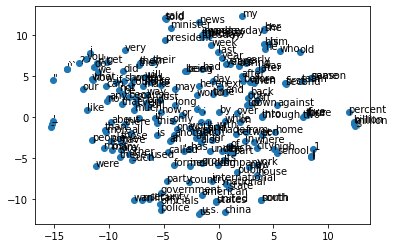

In [43]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

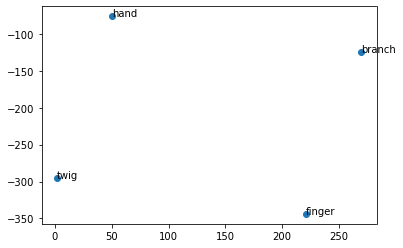

In [44]:
tsne = TSNE(n_components=2, random_state=0)

tokens = ["branch", "twig", "finger", "hand"]
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:1000])

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()